In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import datetime

%matplotlib inline
plt.rcParams['font.family'] = 'IPAPGothic'

train_C = pd.read_table('../data/train/train_C.tsv')

In [3]:
train_C['event_type_1'] = train_C['event_type'] == 1
train_C['event_type_2'] = train_C['event_type'] == 2
train_C['event_type_3'] = train_C['event_type'] == 3

- まずユーザーの行動をイメージするために個人のデータを見る。

In [4]:
train_C[train_C['user_id'] == '0000000_C'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp,event_type_1,event_type_2,event_type_3
4,0000000_C,00311374_c,1,-1,2017-04-29 00:26:20.526,True,False,False
3,0000000_C,00290915_c,1,-1,2017-04-29 00:28:45.632,True,False,False
1,0000000_C,00217428_c,1,-1,2017-04-29 00:31:43.088,True,False,False
0,0000000_C,00209392_c,1,-1,2017-04-29 00:33:50.804,True,False,False
2,0000000_C,00217428_c,1,-1,2017-04-29 00:34:32.473,True,False,False
5,0000000_C,00311374_c,1,-1,2017-04-30 05:33:16.726,True,False,False
10,0000000_C,00190500_c,1,-1,2017-04-30 05:34:16.301,True,False,False
16,0000000_C,00294192_c,1,-1,2017-04-30 05:35:31.399,True,False,False
14,0000000_C,00205242_c,1,-1,2017-04-30 05:36:08.613,True,False,False
20,0000000_C,00003661_c,1,-1,2017-04-30 05:37:44.466,True,False,False


## 不動産について分かっていること
- カートは無い。 閲覧、クリック、購入の3つ
- 比較的アド経由でない購入の割合が多い
- 閲覧のみのユーザーが多い

## 調べたいこと、仮説
##### ユーザーの分類
- 閲覧ばかりの人、クリックや購入をする人で分類できるか？

##### 商品の分類
- よく閲覧や購入されている商品はないか？

##### ユーザーと商品を合わせた分類
- 対応するユーザーグループと商品グループの組み合わせは無いか？

##### 時間に関連した分析
- 購入した商品は事前に閲覧されているか？(アド経由購入/アド経由でない購入 について)
- 2

## ユーザーの分類

In [5]:
users = train_C['user_id'].unique()
print('ユーザー数：'+str(len(users)))

ユーザー数：43271


In [6]:
print('閲覧以外もしたユーザー数：'+str(len(train_C[train_C['event_type'] != 1]['user_id'].unique())))
print('クリックしたユーザー数：'+str(len(train_C[train_C['event_type_2']]['user_id'].unique())))
print('購入したユーザー数：'+str(len(train_C[train_C['event_type_3']]['user_id'].unique())))

閲覧以外もしたユーザー数：6603
クリックしたユーザー数：6061
購入したユーザー数：669


In [7]:
print('ユーザーごとの購入回数の分布')
print(train_C.groupby('user_id')['event_type_3'].sum().value_counts().sort_index())

ユーザーごとの購入回数の分布
0.0     42602
1.0       387
2.0       141
3.0        55
4.0        31
5.0        24
6.0         6
7.0         5
8.0         5
9.0         1
10.0        5
11.0        4
12.0        2
13.0        1
14.0        1
15.0        1
Name: event_type_3, dtype: int64


- 購入している人は全体の1.5%くらいだが、そのうち40%程度が複数購入している。→次の一週間も購入する確率が高い？

In [8]:
print('ユーザーごとのクリック回数の分布')
print(train_C.groupby('user_id')['event_type_2'].sum().value_counts().sort_index())

ユーザーごとのクリック回数の分布
0.0     37210
1.0      2924
2.0      1293
3.0       713
4.0       412
5.0       231
6.0       161
7.0        91
8.0        59
9.0        46
10.0       34
11.0       24
12.0       18
13.0       11
14.0        8
15.0       10
16.0        7
17.0        6
18.0        2
19.0        3
20.0        1
21.0        1
22.0        1
23.0        1
24.0        1
25.0        1
31.0        2
Name: event_type_2, dtype: int64


#### (閲覧してない1人は何をしたのか？)

In [9]:
set(users) - set(train_C[train_C['event_type'] == 1]['user_id'].unique())

{'0014945_C'}

In [10]:
train_C[train_C['user_id'] == '0014945_C'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp,event_type_1,event_type_2,event_type_3
1044795,0014945_C,00258288_c,3,0,2017-04-15 05:15:05.581,False,False,True
1044798,0014945_C,00275212_c,3,0,2017-04-15 05:31:06.514,False,False,True
1044797,0014945_C,00035121_c,3,0,2017-04-15 05:34:07.420,False,False,True
1044790,0014945_C,00010767_c,3,0,2017-04-15 05:38:13.907,False,False,True
1044796,0014945_C,00218936_c,3,0,2017-04-15 05:41:18.775,False,False,True
1044791,0014945_C,00045567_c,3,0,2017-04-15 05:57:42.433,False,False,True
1044789,0014945_C,00129143_c,3,0,2017-04-15 06:00:13.124,False,False,True
1044799,0014945_C,00060189_c,3,0,2017-04-15 06:01:56.894,False,False,True
1044792,0014945_C,00050206_c,3,0,2017-04-15 06:10:46.641,False,False,True
1044794,0014945_C,00297716_c,3,0,2017-04-15 06:14:01.259,False,False,True


- 購入だけしている

##### クリックと閲覧の関係

In [11]:
user_e2 = train_C.groupby('user_id')['event_type_2'].sum().sort_index()
user_e3 = train_C.groupby('user_id')['event_type_3'].sum().sort_index()
merged_count_df = pd.concat([user_e2, user_e3], axis=1)
merged_count_df.columns = ['クリック','購入']
pd.pivot_table(merged_count_df, index=['クリック'], columns=['購入'], aggfunc=lambda x: len(x), fill_value=0)

購入,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
クリック,,,,,,,,,,,,,,,,
0.0,36668,317,115,43,22,20,6,5,3,0,4,3,2,1,1,0
1.0,2868,35,8,5,2,2,0,0,2,1,1,0,0,0,0,0
2.0,1262,14,12,2,3,0,0,0,0,0,0,0,0,0,0,0
3.0,696,11,2,2,2,0,0,0,0,0,0,0,0,0,0,0
4.0,403,3,2,1,1,2,0,0,0,0,0,0,0,0,0,0
5.0,228,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
6.0,156,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1
7.0,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8.0,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
merged_count_df.corr()

,クリック,購入
クリック,1.000000,0.014201
購入,0.014201,1.000000


- クリック数と購入数に相関は無い(クリックするからといって購入する訳では無い)

In [13]:
user_e1 = train_C.groupby('user_id')['event_type_1'].sum().sort_index()
merged3_count_df = pd.concat([merged_count_df, user_e1], axis=1)
merged3_count_df.columns = ['クリック', '購入', '閲覧']
merged3_count_df.corr()

,クリック,購入,閲覧
クリック,1.000000,0.014201,0.126796
購入,0.014201,1.000000,0.053949
閲覧,0.126796,0.053949,1.000000


- 閲覧もほぼ相関無し

##### k-Means、エルボー法で分類

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(merged3_count_df)
merged3_count_df_std = sc.transform(merged3_count_df)
from sklearn.cluster import KMeans
X = merged3_count_df_std
dist_list =[]
for i in range(1,20):
    kmpp = KMeans(n_clusters=i,init="random",n_init=5,max_iter=100,random_state=0) 
    kmpp.fit(X)
    dist_list.append(kmpp.inertia_)

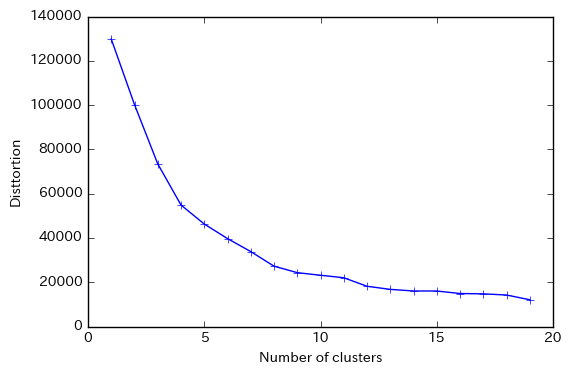

In [15]:
plt.plot(range(1,20),dist_list,marker='+');
plt.xlabel("Number of clusters");
plt.ylabel("Disttortion");

- とりあえずk=4にする

In [52]:
X = merged3_count_df_std
kmpp = KMeans(n_clusters=4,init="random",random_state=0)
kmpp.fit(X)
label_df = pd.DataFrame(kmpp.labels_, columns=["cluster"])

In [53]:
label_df.groupby("cluster").size()

cluster
0      665
1      276
2    40528
3     1802
dtype: int64

##### クリック数と購入数

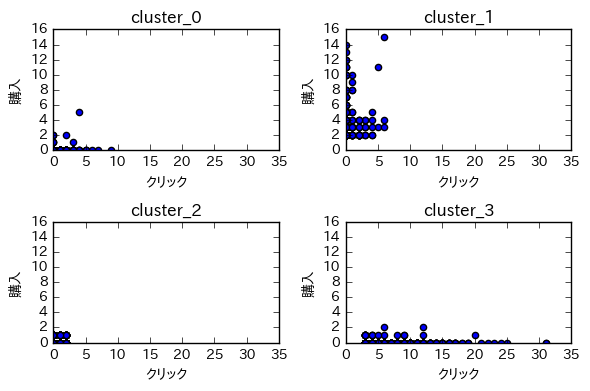

In [54]:
target_df = merged3_count_df.reset_index().rename(columns={"index":"user_id"})[['クリック', '購入','閲覧']]
clustered_df = pd.concat([target_df, label_df], axis=1)
for i in range(0,4):
    df_sampled = clustered_df[clustered_df["cluster"] == i]
    plt.subplot(2, 2, i+1)
    plt.scatter(df_sampled.as_matrix()[:,0],df_sampled.as_matrix()[:,1])
    plt.xlim(0,35)
    plt.ylim(0,16)
    plt.xlabel(u'クリック')
    plt.ylabel(u'購入')
    plt.title("cluster_" + str(i))
plt.tight_layout()

In [77]:
clustered_df[clustered_df['cluster']==3]

,クリック,購入,閲覧,cluster
5,3.0,0.0,34.0,3
19,5.0,0.0,37.0,3
30,3.0,0.0,61.0,3
101,3.0,0.0,23.0,3
159,4.0,0.0,22.0,3
189,3.0,0.0,91.0,3
239,3.0,0.0,93.0,3
311,4.0,0.0,19.0,3
335,10.0,0.0,55.0,3
364,3.0,0.0,45.0,3


In [79]:
train_C[train_C['user_id'] == '0000335_C'].sort_values(by = ['time_stamp'])

,user_id,product_id,event_type,ad,time_stamp,event_type_1,event_type_2,event_type_3,day
846373,0000335_C,00264446_c,2,-1,2017-04-03 05:30:45.406,False,True,False,3
846369,0000335_C,00264446_c,1,-1,2017-04-03 05:30:55.805,True,False,False,3
846361,0000335_C,00007245_c,2,-1,2017-04-03 05:30:55.986,False,True,False,3
846357,0000335_C,00007245_c,1,-1,2017-04-03 05:31:01.373,True,False,False,3
846367,0000335_C,00259357_c,2,-1,2017-04-03 05:31:28.955,False,True,False,3
846364,0000335_C,00259357_c,1,-1,2017-04-03 05:31:31.436,True,False,False,3
846372,0000335_C,00264446_c,2,-1,2017-04-03 06:35:15.203,False,True,False,3
846370,0000335_C,00264446_c,1,-1,2017-04-03 06:35:22.978,True,False,False,3
846362,0000335_C,00007245_c,2,-1,2017-04-03 06:36:00.904,False,True,False,3
846355,0000335_C,00007245_c,1,-1,2017-04-03 06:36:08.378,True,False,False,3


##### 閲覧数の分布

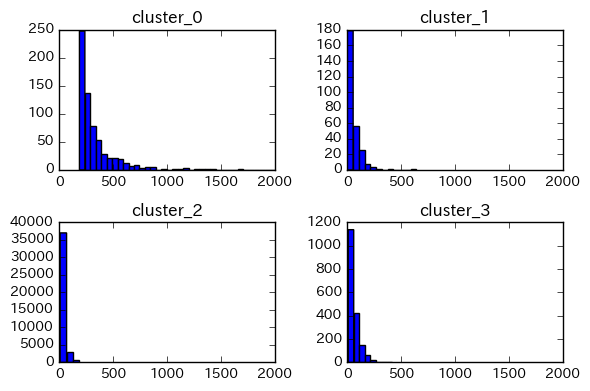

In [55]:
for i in range(0,4):
    df_sampled = clustered_df[clustered_df["cluster"] == i]
    plt.subplot(2, 2, i+1)
    p = df_sampled.as_matrix()[:,2]
    plt.hist(p,bins=int((p.max()-p.min())/50))
    plt.xlim(0,2000)
    plt.title("cluster_" + str(i))
plt.tight_layout()

- 閲覧が多いユーザー、購入が多いユーザー、クリックが多いユーザー、どれも多くないユーザーに分かれた

## 商品の分類

In [20]:
products = train_C['product_id'].unique()
print('商品数：'+str(len(products)))

商品数：313609


In [21]:
print('閲覧以外もされた商品数：'+str(len(train_C[train_C['event_type'] != 1]['product_id'].unique())))
print('クリックされた商品数：'+str(len(train_C[train_C['event_type_2']]['product_id'].unique())))
print('購入された商品数：'+str(len(train_C[train_C['event_type_3']]['product_id'].unique())))

閲覧以外もされた商品数：9171
クリックされた商品数：8394
購入された商品数：862


In [22]:
print('商品ごとの購入回数の分布')
print(train_C.groupby('product_id')['event_type_3'].sum().value_counts().sort_index())

商品ごとの購入回数の分布
0.0     312747
1.0        640
2.0        128
3.0         41
4.0         15
5.0         15
6.0          5
7.0          3
8.0          3
9.0          1
10.0         6
11.0         2
12.0         2
14.0         1
Name: event_type_3, dtype: int64


In [23]:
print('商品ごとのクリック回数の分布')
print(train_C.groupby('product_id')['event_type_2'].sum().value_counts().sort_index())

商品ごとのクリック回数の分布
0.0       305215
1.0         6372
2.0         1372
3.0          408
4.0          137
5.0           49
6.0           23
7.0           11
8.0            3
9.0            1
10.0           2
13.0           2
16.0           1
47.0           1
60.0           1
78.0           1
88.0           1
96.0           1
105.0          1
118.0          1
153.0          1
170.0          1
214.0          1
381.0          1
487.0          1
1230.0         1
Name: event_type_2, dtype: int64


In [24]:
product_e1 = train_C.groupby('product_id')['event_type_1'].sum().sort_index()
product_e2 = train_C.groupby('product_id')['event_type_2'].sum().sort_index()
product_e3 = train_C.groupby('product_id')['event_type_3'].sum().sort_index()
p_merged3_count_df = pd.concat([product_e2, product_e3, product_e1], axis=1)
p_merged3_count_df.columns = ['クリック', '購入', '閲覧']
p_merged3_count_df.corr()

,クリック,購入,閲覧
クリック,1.000000,0.006109,0.556091
購入,0.006109,1.000000,0.071471
閲覧,0.556091,0.071471,1.000000


- クリックと閲覧には相関がありそう

##### k-Means、エルボー法

In [25]:
from sklearn.preprocessing import StandardScaler
p_sc = StandardScaler()
p_sc.fit(p_merged3_count_df)
p_merged3_count_df_std = sc.transform(p_merged3_count_df)
from sklearn.cluster import KMeans
p_X = p_merged3_count_df_std
p_dist_list =[]
for i in range(1,20):
    p_kmpp = KMeans(n_clusters=i,init="random",n_init=5,max_iter=100,random_state=0) 
    p_kmpp.fit(p_X)
    p_dist_list.append(p_kmpp.inertia_)

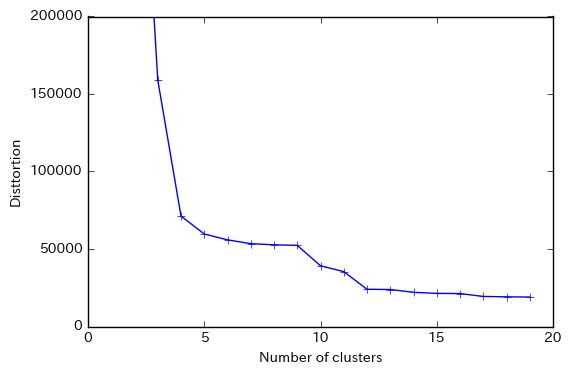

In [26]:
plt.plot(range(1,20),p_dist_list,marker='+');
plt.xlabel("Number of clusters");
plt.ylabel("Disttortion");
plt.ylim(0,200000);

- これもk=4❌
- k=12

In [27]:
p_X = p_merged3_count_df_std
p_kmpp = KMeans(n_clusters=12,init="random",random_state=0)
p_kmpp.fit(p_X)
p_label_df = pd.DataFrame(p_kmpp.labels_, columns=["cluster"])

In [28]:
p_label_df.groupby("cluster").size()

cluster
0        856
1      91723
2          1
3      25974
4     183241
5          1
6          1
7       3620
8          1
9          2
10         7
11      8182
dtype: int64

- ほぼクラスター0になった❌
- 異常な人と他(約6クラスター)

##### クリックと購入

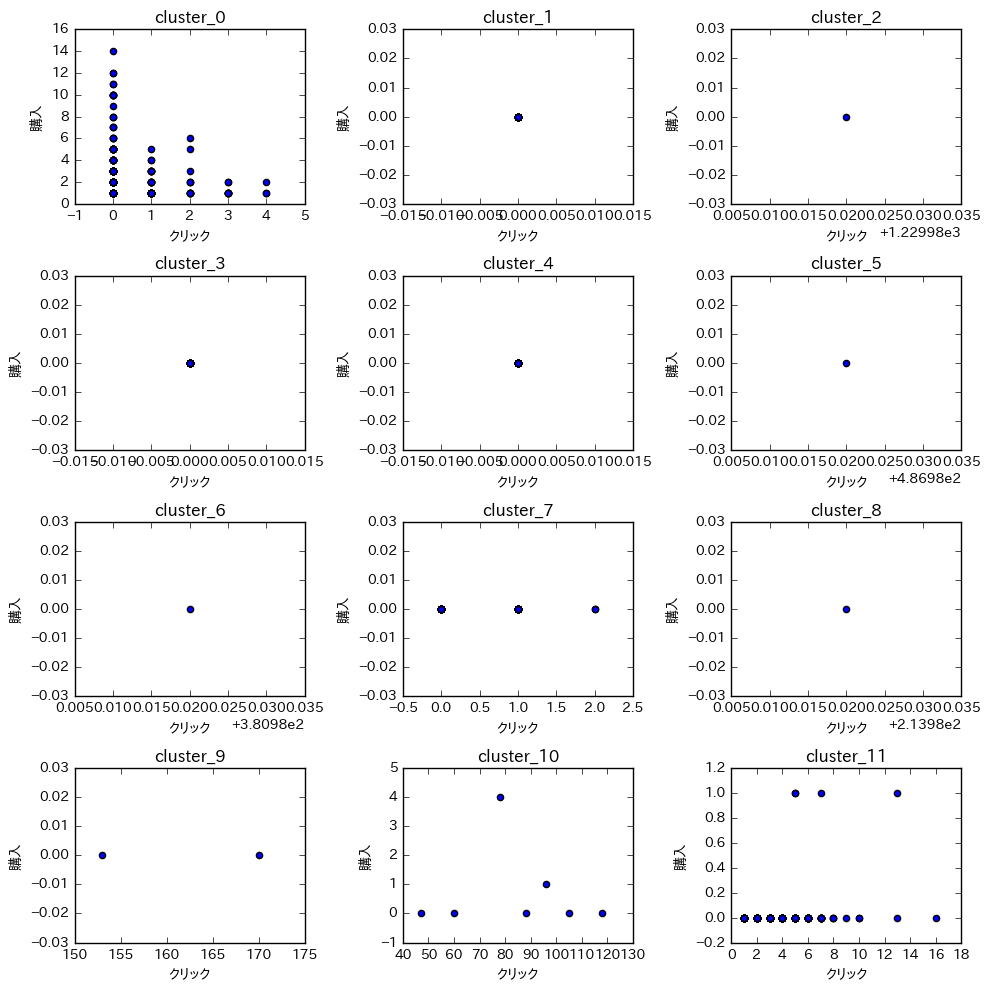

In [29]:
plt.figure(figsize=(10,10))
p_target_df = p_merged3_count_df.reset_index().rename(columns={"index":"user_id"})[['クリック', '購入','閲覧']]
p_clustered_df = pd.concat([p_target_df, p_label_df], axis=1)
for i in range(0,12):
    p_df_sampled = p_clustered_df[p_clustered_df["cluster"] == i]
    plt.subplot(4, 3, i+1)
    plt.scatter(p_df_sampled.as_matrix()[:,0],p_df_sampled.as_matrix()[:,1])
    #plt.xlim(0,500)
    #plt.ylim(0,16)
    plt.xlabel(u'クリック')
    plt.ylabel(u'購入')
    plt.title("cluster_" + str(i))
plt.tight_layout()

##### 閲覧数

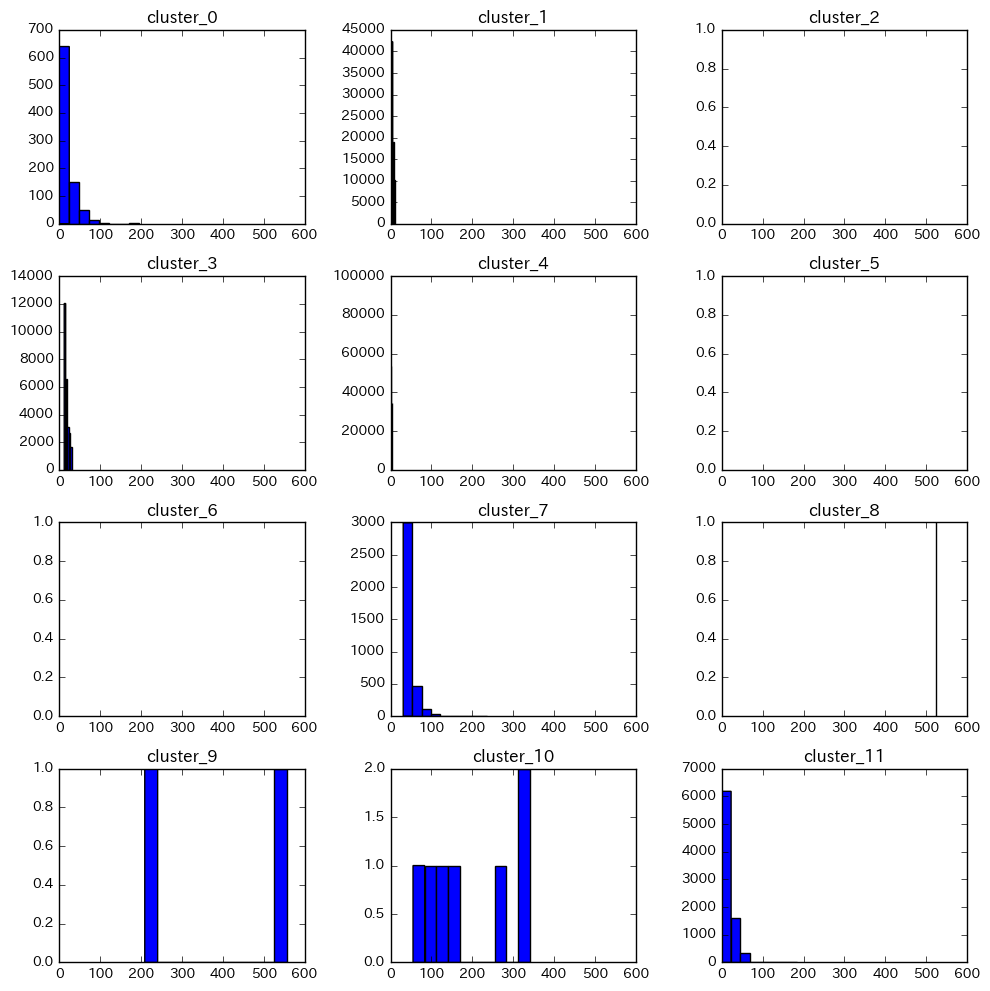

In [30]:
plt.figure(figsize=(10,10))
for i in range(0,12):
    p_df_sampled = p_clustered_df[p_clustered_df["cluster"] == i]
    plt.subplot(4, 3, i+1)
    p = p_df_sampled.as_matrix()[:,2]
    plt.hist(p,bins=int((p.max()-p.min())/50)+5)
    plt.xlim(0,600)
    plt.title("cluster_" + str(i))
plt.tight_layout()

- 極端なもの以外だとクリック数が多いものや購入数が多いものが分かれそう

## 時間に関連した分析

In [31]:
train_C['day'] = train_C['time_stamp'].map(lambda x: pd.to_datetime(x).day)

In [32]:
usercount = train_C['user_id'].value_counts().count();

平均1.26426320939


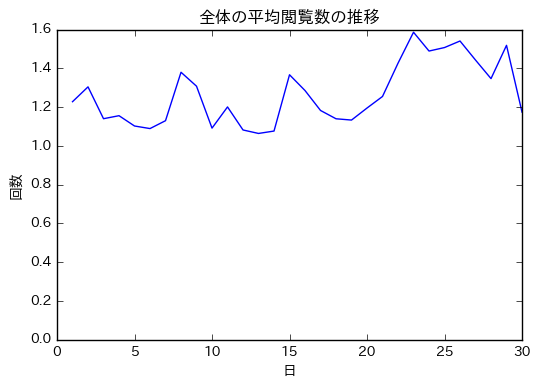

In [33]:
p = train_C.groupby('day')[['event_type_1']].sum() / usercount
plt.plot(p[0:30])
plt.ylim(0, 1.6)
plt.title(u'全体の平均閲覧数の推移');
plt.xlabel(u'日');
plt.ylabel(u'回数');
print('平均'+str(p[0:30].mean()[0]))

平均0.0111891721168


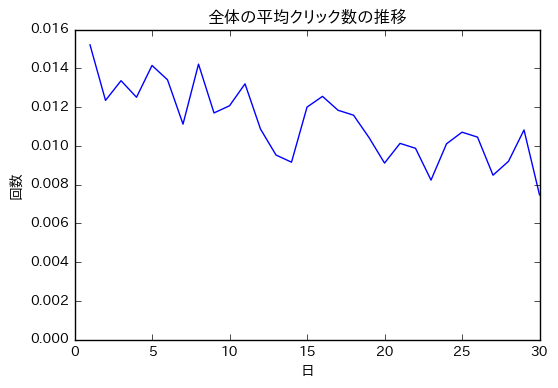

In [34]:
p = train_C.groupby('day')[['event_type_2']].sum() / usercount
plt.plot(p[0:30])
plt.ylim(0,0.016)
plt.title(u'全体の平均クリック数の推移');
plt.xlabel(u'日');
plt.ylabel(u'回数');
print('平均'+str(p[0:30].mean()[0]))

平均0.00103687612181


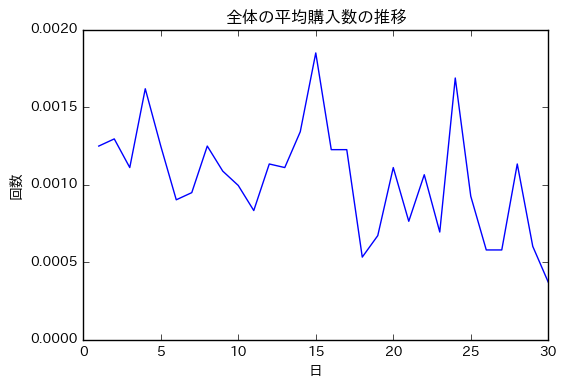

In [35]:
p = train_C.groupby('day')[['event_type_3']].sum() / usercount
plt.plot(p[0:30])
plt.ylim(0,0.002)
plt.title(u'全体の平均購入数の推移');
plt.xlabel(u'日');
plt.ylabel(u'回数');
print('平均'+str(p[0:30].mean()[0]))

- ばらつきはあるが誤差の内？
- 時期的に4月は減っていく時期?

In [36]:
print(len(train_C['user_id'].unique()))
print(len(train_C['product_id'].unique()))
print(len(train_C[train_C['event_type_3']]))

43271
313609
1358


##### 購入した人はその前の期間に何をしている傾向があるか？
- 16日以降に購入した人の前15日間のアクションの平均を調べる

In [46]:
count = 0
countad = 0
a = None
for e in train_C[train_C['event_type_3']][['day', 'user_id', 'product_id', 'ad']].as_matrix():
    if e[0] > 15 and e[0] < 31:
        add = train_C[np.logical_and(train_C['user_id'] == e[1], train_C['day'] <= e[0])][['day', 'event_type', 'product_id']]
        add['day'] = add['day'].map(lambda x: x - e[0]) #何日前か(マイナス)
        add['product_id'] = add['product_id'].map(lambda x: x==e[2]) #同じ商品かbool
        add['ad'] = e[3]
        if count != 0:
            a = pd.concat([a, add])
        else:
            a = add
        count = count + 1
        countad = countad + e[3]

In [47]:
aad = a[a['ad']==1]
print(len(a), len(aad))
print(count, countad)

(33386, 13125)
(569, 197)


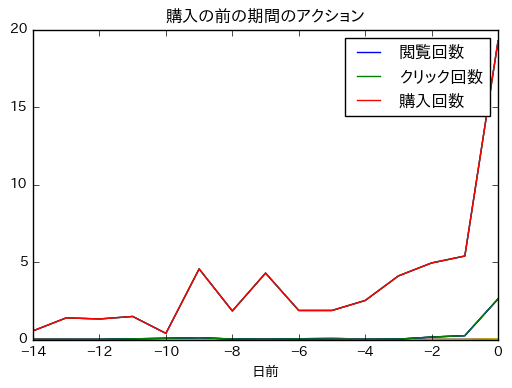

In [50]:
plt.plot(aad[aad['event_type'] == 1].groupby('day').count() / countad);
plt.plot(aad[aad['event_type'] == 2].groupby('day').count() / countad);
plt.plot(aad[aad['event_type'] == 3].groupby('day').count() / countad);
plt.legend([u'閲覧回数', u'クリック回数', u'購入回数']);
plt.xlim(-14,0);
plt.xlabel(u'日前');
plt.title(u'購入の前の期間のアクション');

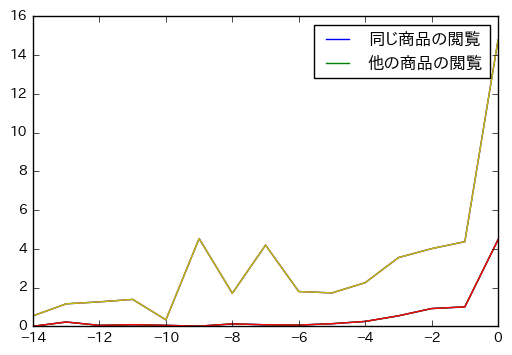

In [51]:
plt.plot(aad[np.logical_and(aad['event_type'] == 1, aad['product_id'])].groupby('day').count() / countad)
plt.plot(aad[np.logical_and(aad['event_type'] == 1, np.logical_not(aad['product_id']))].groupby('day').count() / countad)
plt.legend([u'同じ商品の閲覧',u'他の商品の閲覧']);
plt.xlim(-14,0);

- 購入する9日ほど前にはその商品を閲覧している割合が高い→閲覧から購入を予想できるのでは?

# 評価値の導出式

### 方針

- 似たユーザーがアドを見たときに買いそうなほど高い値になるようにする

### イメージ

- アド経由で買った→高ポイント
- アド経由無しで買った→そこそこ高ポイント
- 迷ったけどやめた→中ポイント
- 見てすぐやめた→低ポイント

In [ ]:
#関数
def score(eventlist):
    if np.logical_and(eventlist['event_type'] == 3, eventlist['ad'] == 1).sum() > 0:
        return 10.0
    if np.logical_and(eventlist['event_type'] == 3, eventlist['ad'] == 0).sum() > 0:
        return 8.0
    score = 0
    for event in events:
        if event['event_type'] == 1:
            score += 1.0
        else if event['event_type'] == 2:
            score += 2.0
    return score

(思ったこと)

閲覧だけしてる商品は評価値自体は高くなくても、その人が買う確率は高い？

- クラスターごとに点数のつけかた変える

#### 評価値つけかた

###### 時間について

- 最近見たほど高スコア…あまり他のユーザーは関係ない

(協調フィルタリング行列にユーザー×商品行列を足した方がいい？(+商品ごとの値))

###### クラスターと評価値

- ユーザー/商品ごとの各イベントの回数をつかう？

- パラメータの基準

In [ ]:
#関数
def score(eventlist, user_cluster):
    '''user_cluster分類
    0 : 閲覧が多いグループ。クリック/購入はほぼ0。同じものを後で見ることもある。
    1 : 購入が多いグループ。何度か閲覧してから購入する場合が多い。
    2 : どれも多くない。閲覧だけを100回未満など。同じものを後で見ることもある。割合は一番大きい。
    3 : クリックが多い。同じものを何度もクリックや閲覧している。
    '''
    scores = {
        0 : [5.0, 4.5, 3.0, 0.2, 0.2, 4.0]
        1 : [5.0, 4.5, 3.0, 0.4, 0.4, 5.0]
        2 : [5.0, 4.5, 3.0, 0.2, 0.2, 4.0]
        3 : [5.0, 4.5, 3.0, 0.3, 0.6, 5.0]
    }
    
    if np.logical_and(eventlist['event_type'] == 3, eventlist['ad'] == 1).sum() > 0:
        #アド経由でコンバージェンス
        return scores[user_cluster][0]
    if np.logical_and(eventlist['event_type'] == 3, eventlist['ad'] == 0).sum() > 0:
        #アドなしでコンバージェンス
        return scores[user_cluster][1]
    #それ以外の場合の基準点
    score = scores[user_cluster][2]
    for event in events:
        if event['event_type'] == 1:
            #クリックで加点
            score += scores[user_cluster][3]
        else if event['event_type'] == 2:
            #カートで加点
            score += scores[user_cluster][4]
    #上限より高くはしない
    return min(score,scores[user_cluster][5])